과일 사진을 받아서 가장 많이 받은 과일을 선정하고자 한다. 또한 1위로 선정된 과일 사진을 보낸 사람 중 몇 명을 뽑아 당첨자로 선정한다.  
  
사진을 사람이 하나씩 분류하기는 어렵다. 더 나아가서 미리 과일 분류기를 훈련하기에는 어떤 과일 사진을 받을지 알 수 없어 곤란하다. 사진에 대한 정답(타깃)을 알지 못하는데 어떻게 사진을 종류대로 모을 수 있을까?

### 타깃을 모르는 비지도 학습  
타깃이 없을 때 사용하는 머신러닝 알고리즘이 있다. **비지도 학습(unsupervised learning)**이다. 사람이 가르쳐 주지 않아도 데이터에 있는 무언가를 학습하는 것이다. 어떻게 무엇을 학습해야 할까?  
  
*사진의 픽셀값을 모두 평균을 내면 비슷한 과일끼리 모일까?*  
일단 데이터를 준비하고 픽셀값을 이용해서 사진을 분류해 보자.

#### 과일 사진 데이터 준비하기  
준비한 과일 사진 데이터는 사과, 바나나, 파인애플을 담고 있는 흑백 사진이다. 이 데이터는 넘파이 배열의 기본 저장 포맷인 npy 파일로 저장되어 있다. 넘파이에서 이 파일을 읽으려면 먼저 다운로드 해야한다. 다음 명령어를 실행해 파일을 다운로드 하자

In [20]:
import wget
url = 'https://bit.ly/fruits_300_data'
wget.download(url, out = 'fruits_300.npy') ### wget.download 안에 out = '다른이름으로 저장할 파일 이름' 입력


 67% [.................................................                         ] 2015232 / 3000128

100% [..........................................................................] 3000128 / 3000128

'fruits_300.npy'

다운로드 한 파일에서 데이터를 로드해보자. 먼저 넘파이와 맷플롯립 패키지를 업로드한다.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

넘파이에서 npy 파일을 로드하는 방법은 간단하다. load() 메서드에 파일 이름을 전달하면 된다.

In [21]:
fruits = np.load('fruits_300.npy')

fruits는 넘파이 배열이고 fruits_300.npy 파일에 들어 있는 모든 데이터를 담고 있다. fruits 배열의 크기를 확인해 보자.

In [22]:
print(fruits.shape)

(300, 100, 100)


이 배열의 첫 번째 차원(300)은 샘플의 개수를 나타내고, 두 번째 차원(100)은 이미지 높이, 세 번째 차원(100)은 이미지 너비이다. 이미지 크기는 100 x 100이다. 각 픽셀은 넘파이 배열의 원소 하나에 대응한다. 즉 배열의 크기가 100 x 100이다.  
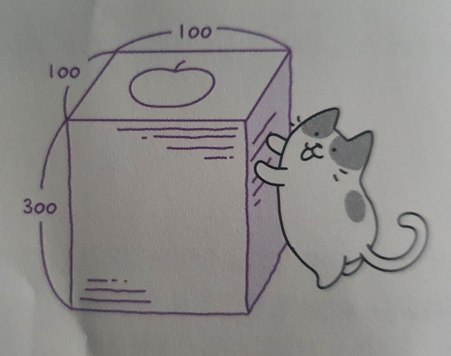  
  
첫 번째 이미지의 첫 번째 행을 출력해 보자. 3차원 배열이기 때문에 처음 2개의 인덱스를 0으로 지정하고 마지막 인덱스는 지정하지 않거나 슬라이싱 연산자를 쓰면 첫 번째 이미지의 첫 번째 행을 모두 선택할 수 있다.

In [24]:
print(fruits[0,0, :]) # 첫번째 행의 모든 열 값을 출력하는 의미와 같다.

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


첫 번째 행에 있는 픽셀 100개에 들어 있는 값을 출력했다. 이 넘파이 배열은 흑백 사진을 담고 있으므로 0 ~ 255 까지의 정숫값을 가진다. 이 정숫값에 대해 더 알아보기 전에 첫 번째 이미지를 그림으로 그려서 이 숫자와 비교해 보자.  
  
맷플롯립 imshow() 함수를 사용하면 넘파이 배열로 지정된 이미지를 쉽게 그릴 수 있다. 흑백 이미지이므로 cmap 매개변수를 'gray'로 지정한다.

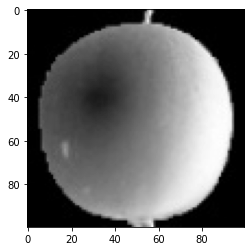

In [26]:
plt.imshow(fruits[0], cmap = 'gray') # fruits의 첫 번째 인덱스만 0으로 지정했으므로 첫 번째 이미지의 행열값을 모두 그리게 된다.
plt.show()

사과같이 보인다. 다음의 그림처럼 첫 번째 행이 위에서 출력한 배열 값에 해당한다. 0에 가까울수록 검게 나타나고 높은 값은 밝게 표시된다.  
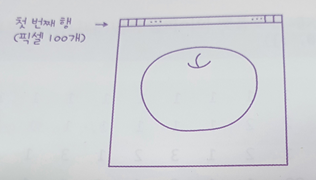  
보통 흑백 샘플 이미지는 바탕이 밝고 물체가 짙은 색이다. 그런데 왜 이렇게 보일까? 사실 이 흑백 이미지는 사진으로 찍은 이미지를 넘파이 배열로 변환할 때 반전시킨 것이다. 사진의 흰 바탕(높은 값)은 검은색(낮은 값)으로 만들고 실제 사과가 있어 짙은 부분(낮은 값)은 밝은색(높은 값)으로 바꾸었다. 다음 그림과 같다.  
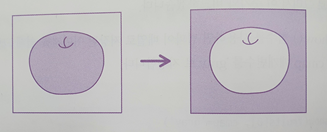  
  
왜 이렇게 바꾸었을까? 관심의 대상은 바탕이 아니라 사과(물체)이기 때문이다. 흰색 바탕은 우리에게 중요하지 않지만 컴퓨터는 255에 가까운 바탕에 집중할 것이다. 따라서 바탕을 검게 만들고 사진에 짙게 나온 사과를 밝은색으로 만들었다.

#### 컴퓨터는 왜 255에 가까운 바탕에 집중하나?  
알고리즘이 어떤 출력을 만들기 위해 곱셈, 덧셈을 한다. 픽셀값이 0이면 출력도 0이 되어 의미가 없다. 픽셀값이 높으면 출력값도 커지기 때문에 의미를 부여하기 좋다.

우리가 보는 것과 컴퓨터가 처리하는 방식이 다르기 때문에 종종 흑백 이미지를 이렇게 반전하여 사용한다. 관심 대상의 영역을 높은 값으로 바꾸었지만 맷플롯립으로 출력할 때 바탕이 검게 나오므로 보기에는 좋지 않다. cmap 매개변수를 'gray_r'로 지정하면 다시 반전하여 우리 눈에 보기 좋게 출력한다.

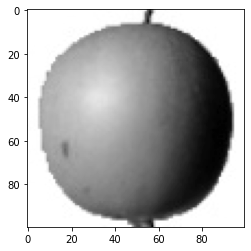

In [27]:
plt.imshow(fruits[0], cmap = 'gray_r')
plt.show()

이 그림에서 밝은 부분이 0에 가깝고 짙은 부분이 255에 가까운 값이다.  
  
이 데이터에는 사과, 바나나, 파인애플이 각각 100개씩 들어 있다. 바나나와 파인애플 이미지도 출력해 보자.

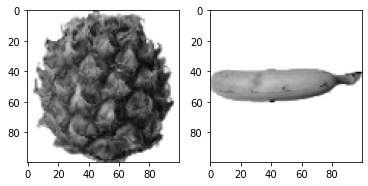

In [28]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[100], cmap = 'gray_r')
axs[1].imshow(fruits[200], cmap = 'gray_r')
plt.show()

그림이 나란히 출력되었다. 맷플롯립의 subplots() 함수를 사용하면 여러 개의 그래프를 배열처럼 쌓을 수 있게 도와준다. subplots() 함수의 두 매개변수는 그래프를 쌓을 행과 열을 지정한다. 여기에서는 subplots(1,2)처럼 하나의 행과 두 개의 열을 지정했다.  
  
반환된 axs는 2개의 서브 그래프를 담고 있는 배열이다. axs[0]에 파인애플 이미지를, axs[1]에 바나나 이미지를 그렸다. 이 장에서 subplots()를 사용해 한 번에 여러 개의 이미지를 그려보겠다.  
  
샘플 데이터가 준비되었다. 이 데이터의 처음 100개는 사과, 그다음 100개는 파인애플, 마지막 100개는 바나나이다. 각 과일 사진의 평균을 내서 차이를 확인해 보자.